### Importing libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture


### Loading the dataset

In [5]:
df= pd.read_csv("../SavedData/fake_transactional_data_24.csv")

In [8]:
df.tail()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025
10148279,53444.0,2.65,A_LOCAL_COFFEE_SHOP,31/12/2025


In [2]:
lloyds_users_df = pd.read_csv('Lloyds_users.csv')

In [3]:
lloyds_users_df

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,...,user_biz_interaction_frequency,user_biz_spend,user_user_interaction,user_user_interaction_frequency,user_user_spend,user_industry_interaction,user_industry_interaction_frequency,user_industry_spend,user_date_transaction,user_date_transaction_freq
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,16.782754,4.50,193,...,"[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","[278.15, 269.25, 217.86, 850.5, 19.5, 347.15, ...","['16354', '18013', '30208', '31489', '36647', ...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","[315.4, 86.5, 35.0, 16130.0, 5.0, 94.0, 24.0, ...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[3, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,...","[114.97999999999999, 145.0, 8.0, 1955.2, 160.0...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[5, 5, 13, 6, 2, 9, 5, 8, 6, 5, 5, 7, 4, 7, 2,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.976434,11.00,197,...,"[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","[13.65, 2.25, 349.77, 791.0, 1275.25, 12.5, 27...","['15896', '28620', '33124', '33732', '34123', ...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","[253.65, 5228.46, 50.0, 106.85, 55.2, 49.9, 32...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Coff...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ...","[19.99, 3002.0, 370.0, 56.25, 33.64, 1685.48, ...","['01/02/2025', '01/03/2025', '01/04/2025', '01...","[3, 4, 1, 8, 3, 3, 2, 3, 2, 6, 3, 7, 1, 9, 7, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,13.178890,4.50,243,...,"[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","[113.0, 256.2, 318.4, 1596.43, 1142.5, 23.0, 4...","['12753', '24398', '24951', '28719', '34678', ...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","[135.5, 83.3, 146.5, 4857.0, 109.0, 124.0, 35....","['Accessories', 'Alcohol', 'Apparel', 'Cafes',...","[15, 7, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ...","[369.0, 145.95999999999998, 37.0, 2015.95, 300...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 3, 10, 2, 3, 12, 5, 6, 3, 3, 3, 3, 4, 6, 1..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,15.281718,4.50,164,...,"[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","[113.35, 142.65, 1896.42, 965.5, 10.0, 212.5, ...","['10432', '14001', '3296', '37438', '37918', '...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","[76.08, 2.45, 35.0, 1.45, 46.0, 61.5, 52.55, 4...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[8, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ...","[166.94, 3464.0, 15.0, 767.9, 99.0, 96.81, 117...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 7, 6, 2, 5, 14, 2, 14, 3, 2, 5, 4, 2, 4, 4..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,32.444350,9.00,219,...,"[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","[118.95, 129.0, 1163.37, 1031.0, 60.0, 3.0, 12...","['22634', '38580', '40565', '44911', '61350', ...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","[125.5, 221.0, 113.0, 24.5, 163.0, 15060.0, 16...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6...","[12.0, 2701.0, 15.0, 514.55, 250.0, 26.36, 136...","['01/02/2025', '01/03/2025', '01/06/2025', '01...","[6, 8, 3, 1, 4, 2, 2, 9, 1, 5, 3, 3, 2, 5, 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,1488,1078,20117.08,17723.34,1283,18920.21,14.746851,9.00,205,...,"[56, 56, 13, 80, 57, 8, 3, 8, 2, 2, 44, 51, 23...","[136.75, 128.05, 265.17, 955.0, 1279.85, 37.0,...","['15880', '24365', '24475', '2858', '33124', '...","[6, 34, 17, 50, 1, 25, 31, 21, 22, 27, 13, 51,...","[31.0, 189.25, 108.0, 3905.35, 50.0, 140.65, 1...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[3, 2, 38, 227, 25, 7, 46, 3, 2, 2, 37, 25, 34...","[114.97999999999999, 263.0, 378.0, 553.85, 135...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[2, 13, 4, 2

## RFM Analysis

### Creating the columns

To calculate the recency value, I will calculate the days between the first date recorded (01/01/2025) and the user's most recent date of transaction. The Frequency value is from the 'total_tx_count' column, and the Monetary value is from the 'total_tx_sum_gbp' column.

In [10]:
# Directly use the 'user_date_transaction' column, which already contains lists of dates
lloyds_users_df['most_recent_tx'] = lloyds_users_df['user_date_transaction'].apply(
    lambda dates: max([datetime.strptime(date, '%d/%m/%Y') for date in dates])
)

# Define the reference date (end date)
end_date = datetime.strptime('31/12/2025', '%d/%m/%Y')

# Calculate Recency
lloyds_users_df['Recency'] = (end_date - lloyds_users_df['most_recent_tx']).dt.days

# Prepare the new DataFrame for RFM analysis
# Assuming 'total_tx_count' is the Frequency and 'total_tx_sum_gbp' is the Monetary value
rfm_df = lloyds_users_df[['user_id', 'Recency', 'total_tx_count', 'total_tx_sum_gbp']].copy()
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']


In [11]:
rfm_df

,user_id,Recency,Frequency,Monetary
0,1000,0,1903,37720.11
1,10000,3,1114,21360.39
2,100000,0,1919,23455.27
3,100002,0,1561,22393.96
4,100019,0,1157,44632.75
...,...,...,...,...
8137,99939,1,1488,20117.08
8138,99949,0,1188,15007.49
8139,99952,0,1501,47107.19
8140,99988,0,1450,37715.77


In [12]:
rfm_df.describe()

,user_id,Recency,Frequency,Monetary
count,8142.000000,8142.000000,8142.000000,8142.000000
mean,50826.578605,0.273397,1423.834930,28492.976394
std,28946.392695,0.641999,368.671402,28058.493848
min,1000.000000,0.000000,441.000000,9012.840000
25%,25450.250000,0.000000,1151.000000,18870.995000
50%,50860.500000,0.000000,1344.500000,22311.565000
75%,75606.750000,0.000000,1682.000000,32637.847500
max,100988.000000,4.000000,3417.000000,524178.630000


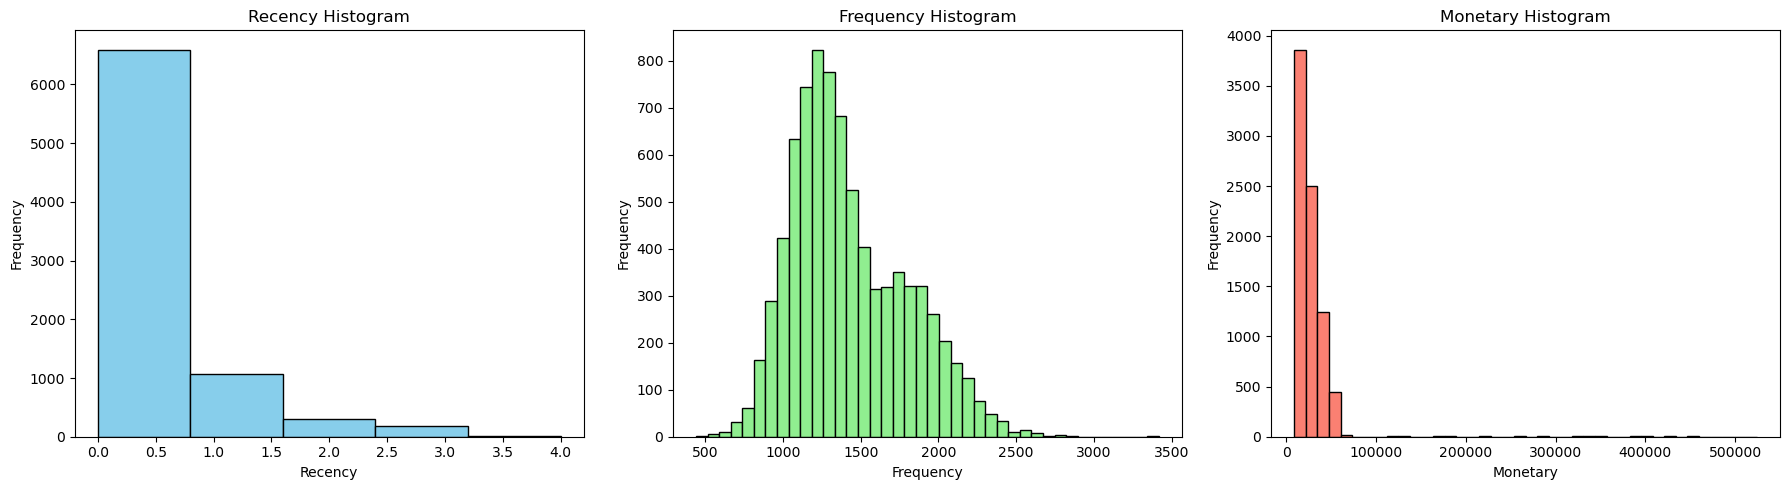

In [13]:
# Create histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Setup a figure with 3 subplots

# Recency Histogram
rfm_df['Recency'].plot(kind='hist', ax=ax[0], bins=5, color='skyblue', edgecolor='black')
ax[0].set_title('Recency Histogram')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Frequency')

# Frequency Histogram
rfm_df['Frequency'].plot(kind='hist', ax=ax[1], bins=40, color='lightgreen', edgecolor='black')
ax[1].set_title('Frequency Histogram')
ax[1].set_xlabel('Frequency')

# Monetary Histogram
rfm_df['Monetary'].plot(kind='hist', ax=ax[2], bins=40, color='salmon', edgecolor='black')
ax[2].set_title('Monetary Histogram')
ax[2].set_xlabel('Monetary')

plt.tight_layout()  
plt.show()


There are many ways to calculate the RFM scores. After exploring my data and researching papers on RFM analysis, I decided to use a scale of 1-4 rather than 1-5 (the common way) given there is only 8142 unique customers in the dataset. Moreover, I will be assigning the scores for Frequency and Monetary values through using quartiles, since there is enough variation in the data to be split into 4 groups. However, all unique accounts seemed to have completed transactions in the last 5 days of the year. Therefore, I will assign a highest score of 4 to all of those who spent money on the last day of the year, and give the accounts who spent in the last 5 days of the year a 3. 

In [18]:
bins = [0, 1, 2, 3, 5]
labels = [4, 3, 2, 1]

# Create 'R_Score' by binning 'Recency'
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'], bins=bins, labels=labels, right=False)

# Convert 'R_Score' to integers
rfm_df['R_Score'] = rfm_df['R_Score']
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Calculate RFM_Score with the adjusted R_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the updated DataFrame to show the adjusted RFM Scores based on the corrected criteria
rfm_df


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1000,0,1903,37720.11,4,4,4,444
1,10000,3,1114,21360.39,1,1,2,112
2,100000,0,1919,23455.27,4,4,3,443
3,100002,0,1561,22393.96,4,3,3,433
4,100019,0,1157,44632.75,4,2,4,424
...,...,...,...,...,...,...,...,...
8137,99939,1,1488,20117.08,3,3,2,332
8138,99949,0,1188,15007.49,4,2,1,421
8139,99952,0,1501,47107.19,4,3,4,434
8140,99988,0,1450,37715.77,4,3,4,434


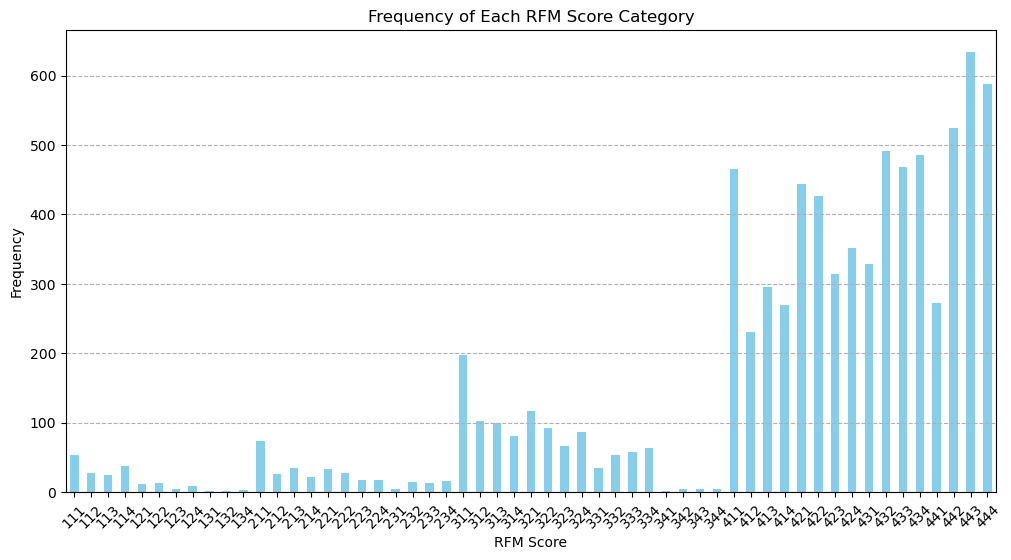

In [19]:
# Creating a histogram for the frequency of each RFM score category

# Count the frequency of each RFM score category
rfm_score_counts = rfm_df['RFM_Score'].value_counts()

# Sort the RFM scores to ensure the histogram follows a logical order
rfm_score_counts = rfm_score_counts.sort_index()

# Plotting
plt.figure(figsize=(12, 6))
rfm_score_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each RFM Score Category')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


In [20]:
# Function to calculate the sum of digits in the RFM score
def sum_of_digits(score):
    return sum(int(digit) for digit in score)

# Adding a new column to the DataFrame for the sum of RFM score digits
rfm_df['Sum_of_Score'] = rfm_df['RFM_Score'].apply(sum_of_digits)

# Defining the sum ranges for each category
champion_value_sums = [11, 12]
high_value_sum_range = range(9, 11)  # Includes 9 and 10
middle_value_sum_range = range(7, 9)  # Includes 7 and 8
low_value_sum_range = range(3, 7)  # Includes 3 through 6

# Categorizing based on sum
rfm_df['Customer_Segment_RFM'] = 'Low Value'  # Default to Low Value

# Applying categorizations
rfm_df.loc[rfm_df['Sum_of_Score'].isin(champion_value_sums), 'Customer_Segment_RFM'] = 'Champion Value'
rfm_df.loc[rfm_df['Sum_of_Score'].isin(high_value_sum_range), 'Customer_Segment_RFM'] = 'High Value'
rfm_df.loc[rfm_df['Sum_of_Score'].isin(middle_value_sum_range), 'Customer_Segment_RFM'] = 'Middle Value'
rfm_df['Customer_Segment_RFM'].value_counts()

High Value        2924
Middle Value      2251
Champion Value    1713
Low Value         1254
Name: Customer_Segment_RFM, dtype: int64

In [ ]:
rfm_df

Reward customers based on their customer segment

## Clustering Customer Segments through k-means

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

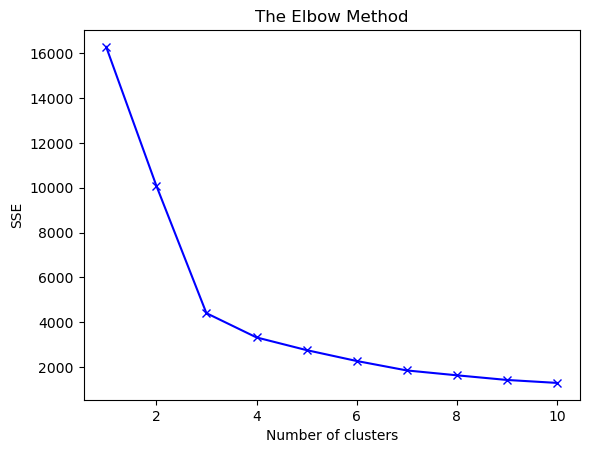

In [40]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[[ 'Frequency', 'Monetary']])

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_  
    

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()


## Clustering the Frequency and Monetary columns with K-means, GMM and DBSCAN

DBSCAN does not require the predetermined number of clusters as an argument, when building a model based on it, but rather it requires e (points within a radius ‘e’ of a point is considered as its neighbours) and ‘minPoints’ (minimum number of points required for a group of points to be considered as a cluster) arguments. Determining
values for these arguments depends on the dataset, therefore finding the best values requires some repeating steps. The algorithm for finding these values is given below: trial and error 

In [288]:
# Assume rfm_df is your DataFrame with 'Frequency' and 'Monetary'

# Standardize the features for use in all clustering algorithms that require it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_df[['Frequency', 'Monetary']])

# Fit the models
# K-Means
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(X_scaled)  # Use scaled data for consistency
rfm_df['Customer Segment Kmeans'] = labels_kmeans

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
labels_gmm = gmm.fit_predict(X_scaled)  # Use scaled data for consistency
rfm_df['Customer Segment GMM'] = labels_gmm

# DBSCAN
dbscan = DBSCAN(eps=0.07, min_samples=40)
labels_dbscan = dbscan.fit_predict(X_scaled)  # DBSCAN uses scaled data
rfm_df['DBSCAN Cluster'] = labels_dbscan

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


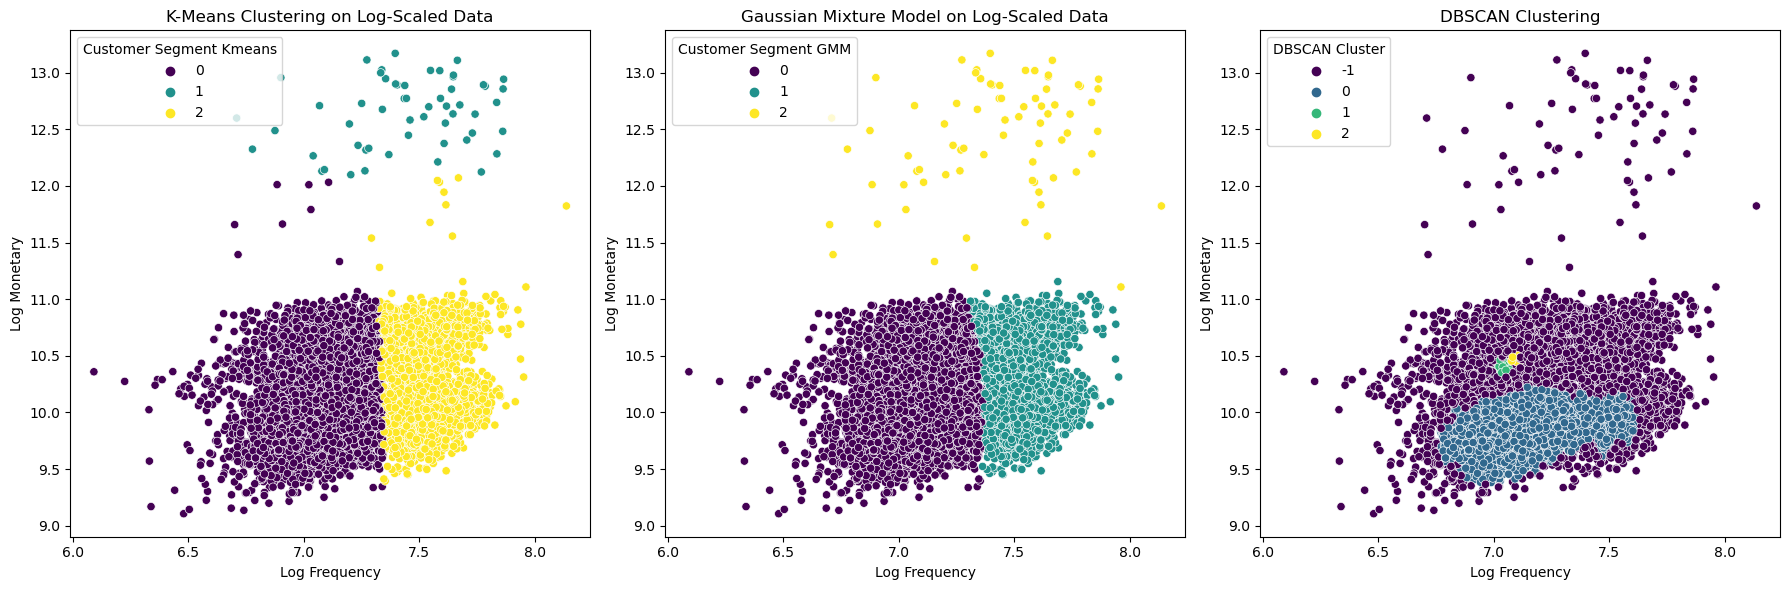

In [289]:
# Apply logarithmic scaling
rfm_df['Log Frequency'] = np.log1p(rfm_df['Frequency'])
rfm_df['Log Monetary'] = np.log1p(rfm_df['Monetary'])

# Plotting
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Log Frequency', y='Log Monetary', hue='Customer Segment Kmeans', palette='viridis')
plt.title('K-Means Clustering on Log-Scaled Data')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Log Frequency', y='Log Monetary', hue='Customer Segment GMM', palette='viridis')
plt.title('Gaussian Mixture Model on Log-Scaled Data')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Log Frequency', y='Log Monetary', hue='DBSCAN Cluster', palette='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


In [279]:
# Calculating the percentage of noise points
noise_percentage = (labels_dbscan == -1).sum() / len(labels_dbscan) * 100

print(f"Percentage of noise points in DBSCAN: {noise_percentage:.2f}%")


Percentage of noise points in DBSCAN: 42.10%


### Comparing unsupervised learning clusters 

In [280]:
# Calculate metrics
# Silhouette scores
silhouette_kmeans = metrics.silhouette_score(X_scaled, labels_kmeans)
silhouette_gmm = metrics.silhouette_score(X_scaled, labels_gmm)
silhouette_dbscan = metrics.silhouette_score(X_scaled, labels_dbscan)

# Calinski-Harabasz Index
ch_kmeans = metrics.calinski_harabasz_score(X_scaled, labels_kmeans)
ch_gmm = metrics.calinski_harabasz_score(X_scaled, labels_gmm)
ch_dbscan = metrics.calinski_harabasz_score(X_scaled, labels_dbscan)

# Davies-Bouldin Index
db_kmeans = metrics.davies_bouldin_score(X_scaled, labels_kmeans)
db_gmm = metrics.davies_bouldin_score(X_scaled, labels_gmm)
db_dbscan = metrics.davies_bouldin_score(X_scaled, labels_dbscan)

# Print the results
print("Silhouette Scores:")
print("K-Means:", silhouette_kmeans)
print("GMM:", silhouette_gmm)
print("DBSCAN:", silhouette_dbscan)

print("\nCalinski-Harabasz Index:")
print("K-Means:", ch_kmeans)
print("GMM:", ch_gmm)
print("DBSCAN:", ch_dbscan)

print("\nDavies-Bouldin Index:")
print("K-Means:", db_kmeans)
print("GMM:", db_gmm)
print("DBSCAN:", db_dbscan)

Silhouette Scores:
K-Means: 0.5446840114203222
GMM: 0.5480397753639167
DBSCAN: -0.18310483482030313

Calinski-Harabasz Index:
K-Means: 10979.58572705711
GMM: 9482.698327088367
DBSCAN: 249.44721066633204

Davies-Bouldin Index:
K-Means: 0.5690053475754556
GMM: 0.6110028097716745
DBSCAN: 1.9092725567366555


1. Silhouette Score
The Silhouette Score is used to measure how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to +1, where a high value indicates that objects are well matched to their own cluster and poorly matched to neighboring clusters.

2. Calinski-Harabasz Index
Also known as the Variance Ratio Criterion, this index measures the cluster cohesion and separation. It is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. Higher values generally indicate better-defined clusters.

3. Davies-Bouldin Index
This index measures the average similarity between each cluster and the cluster most similar to it. Lower values indicate that the clusters are more distinct from each other.